In [9]:
from google.colab import files

uploaded_train = files.upload()

Saving data_k_mean.txt to data_k_mean (1).txt


In [10]:
import io
import pandas as pd

data = pd.read_csv(io.BytesIO(uploaded_train['data_k_mean.txt']), sep = ' ', header = None)
data_np = data.to_numpy()

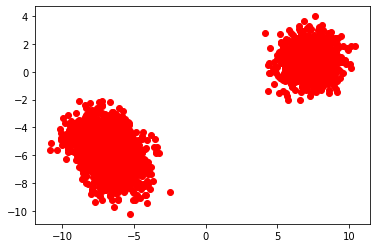

In [11]:
import matplotlib.pyplot as plt

plt.scatter(data[0], data[1], c = 'r', marker = 'o')
plt.show()

In [12]:
k = int(input("Enter the value of k : "))

Enter the value of k : 2


In [13]:
import numpy as np
np.random.seed(seed=4)
random_numbers = np.random.randint(low=0, high=len(data_np), size=(k,))
centroids = [data_np[random_numbers[i]] for i in range(k)]

In [14]:
distance = [] 
index_clusters = [-1 for i in range(len(data_np))] 
count = 0 
clusters = {} 

for x in range(200):
  count = x
  
  flag = 0 
  for y in range(k):
    clusters[y] = []
  
  for i in range(len(data_np)):
    distance = []
    for j in range(k):
      dist = np.sqrt(pow((data_np[i][0] - centroids[j][0]), 2) + pow((data_np[i][1] - centroids[j][1]), 2))
      distance.append(dist)
    ind = distance.index(min(distance))
    
    if index_clusters[i] != ind:
      flag = 1
      index_clusters[i] = ind
    clusters[ind].append(data_np[i])
 
  if flag == 0:
    break
  
  centroids = [np.mean(np.asarray(clusters[z]), axis=0) for z in range(k)]

In [15]:

x1 = np.asarray(clusters[0])[:, 0]
y1 = np.asarray(clusters[0])[:, 1]
x2 = np.asarray(clusters[1])[:, 0]
y2 = np.asarray(clusters[1])[:, 1]

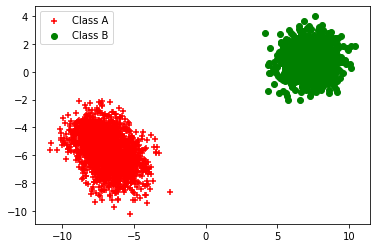

In [16]:
plt.scatter(x1, y1, c = 'r', marker = '+', label = 'Class A')
plt.scatter(x2, y2, c = 'g', marker = 'o', label = 'Class B')
plt.legend(loc = 'best')
plt.show()